In [18]:
import sys, os
#sys.path.append("C:/Users/lebobcrash/Documents/GitHub/Theano/")

import theano.tensor as T
#sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("C:/Users/lebobcrash/Documents/GitHub/pygeomod/pygeomod")
#sys.path.append("/home/miguel/PycharmProjects/GeMpy/GeMpy")

sys.path.append("C:/Users/lebobcrash/Documents/GitHub/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/GeMpy/GeMpy")
sys.path.append("/home/bl3/PycharmProjects/pygeomod/pygeomod")
sys.path.append("/home/miguel/PycharmProjects/GeMpy/GeMpy")
import GeoMig
import importlib
#import geogrid
importlib.reload(GeoMig)
import importlib
#importlib.reload(GeoMig)
import numpy as np
import pandas as pn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from skimage import measure

os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
#%matplotlib inline
%matplotlib notebook

In [28]:
GeoMig.Interpolator??

In [30]:
testmodel = GeoMig.Interpolator(0,140,
                                0,10,
                                0,100,
                               u_grade=0)

# set grid resolution
testmodel.set_resolutions(140,4,100)
testmodel.create_regular_grid_3D()

# compile
testmodel.theano_compilation_3D()

/home/bl3/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


##### load data

In [53]:
testmodel.load_data_csv("foliations", os.pardir+"/input_data/foliations_alex2.csv")
testmodel.load_data_csv("interfaces", os.pardir+"/input_data/interfaces_alex2.csv")
testmodel.Foliations = testmodel.Foliations.drop('Unnamed: 0', 1)
testmodel.Interfaces = testmodel.Interfaces.drop('Unnamed: 0', 1)
testmodel.Foliations

,X,Y,Z,azimuth,dip,polarity,formation
0,0.0,0.0,33.0,90.0,-43.363423,1.0,Layer3
1,0.0,0.0,0.0,90.0,0.000000,1.0,Layer4
2,0.0,0.0,61.0,90.0,-15.524111,1.0,Layer5
3,20.0,0.0,45.0,90.0,-15.524111,1.0,Layer3
4,20.0,0.0,0.0,90.0,0.000000,1.0,Layer4
5,20.0,0.0,66.0,90.0,-15.524111,1.0,Layer5
6,40.0,0.0,42.0,90.0,31.429566,1.0,Layer3
7,40.0,0.0,0.0,90.0,0.000000,1.0,Layer4
8,40.0,0.0,72.0,90.0,-15.524111,1.0,Layer5
9,60.0,0.0,63.0,90.0,43.363423,1.0,Layer1


In [54]:
testmodel.formations

array(['Layer2', 'Layer3', 'Layer5', 'Layer1', 'Layer4'], dtype=object)

In [55]:
testmodel.set_series({"Initial": (testmodel.formations[0],
                                  testmodel.formations[1],
                                  testmodel.formations[3],
                                  testmodel.formations[4]),
                      "Unconformity": testmodel.formations[2]
                     })

In [56]:
testmodel.series

,Unconformity,Initial
0,Layer5,Layer2
1,Layer5,Layer3
2,Layer5,Layer1
3,Layer5,Layer4


In [57]:
testmodel

The serie formations are Layer2|Layer3|Layer1|Layer4
The formations are: 
Layers          X    Y     Z formation
0     0.0  0.0  50.0    Layer2
1     0.0  0.0  25.0    Layer3
3    10.0  0.0  35.0    Layer3
5    20.0  0.0  43.0    Layer3
7    30.0  0.0  47.0    Layer3
9    40.0  0.0  48.0    Layer3
11   50.0  0.0  43.0    Layer3
13   60.0  0.0  61.0    Layer2
14   60.0  0.0  35.0    Layer3
16   70.0  0.0  51.0    Layer2
17   70.0  0.0  26.0    Layer3
19   80.0  0.0  53.0    Layer1
20   80.0  0.0  41.0    Layer2
21   80.0  0.0  16.0    Layer3
23   90.0  0.0  44.0    Layer1
24   90.0  0.0  33.0    Layer2
25   90.0  0.0   8.0    Layer3
27  100.0  0.0  40.0    Layer1
28  100.0  0.0  28.0    Layer2
29  100.0  0.0   3.0    Layer3
31  110.0  0.0  39.0    Layer1
32  110.0  0.0  27.0    Layer2
33  110.0  0.0   2.0    Layer3
35  120.0  0.0  43.0    Layer1
36  120.0  0.0  31.0    Layer2
37  120.0  0.0   6.0    Layer3
39  130.0  0.0  51.0    Layer1
40  130.0  0.0  39.0    Layer2
41  130.0  0.0  14.

<IPython.core.display.Javascript object>


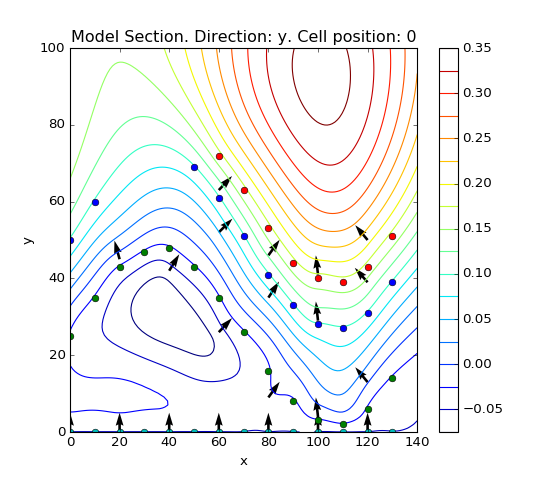

In [58]:
testmodel.compute_potential_field("Initial", verbose = 2)
testmodel.plot_potential_field_2D(direction = "y", cell_pos = 0, figsize=(7,6), contour_lines = 20)

The serie formations are Layer5


<IPython.core.display.Javascript object>


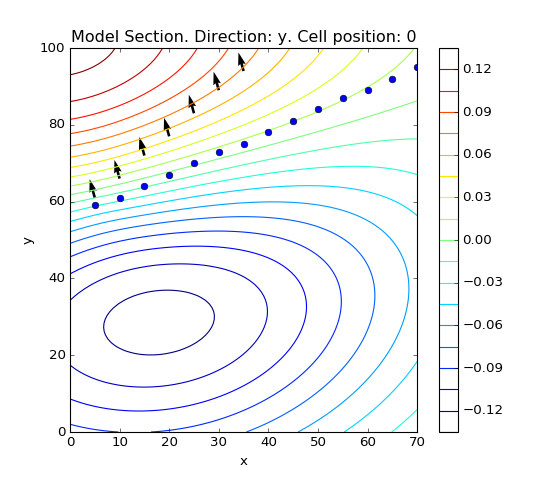

In [92]:
testmodel.compute_potential_field("Unconformity", verbose = 1)
testmodel.plot_potential_field_2D(direction = "y", cell_pos = 0, figsize=(7,6), contour_lines = 20)

3
[1 1 1 ..., 1 1 1] 0
The serie formations are Layer5
[1 2 4 5]
[1 1 1 ..., 1 0 0] 12391
The serie formations are Layer2|Layer3|Layer1|Layer4


<IPython.core.display.Javascript object>


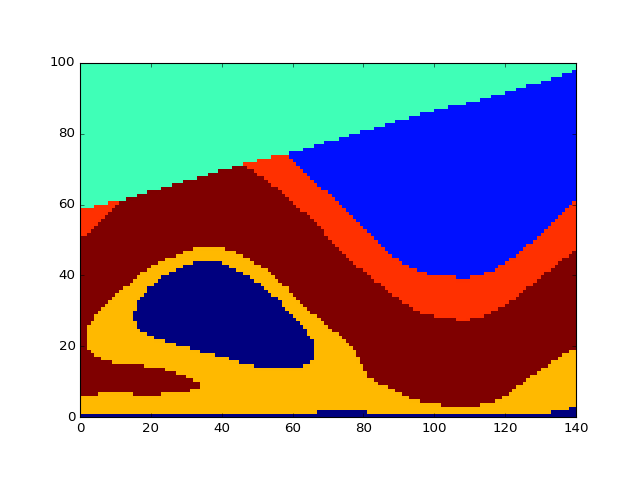

In [59]:
%matplotlib qt4
# Reset the block
testmodel.block.set_value(np.zeros_like(testmodel.grid[:,0]))

# Compute the block
testmodel.compute_block_model([0,1], verbose = 1)
sandstone = testmodel

plot_block =  sandstone.block.get_value().reshape(140,4,100)
plt.imshow(plot_block[:,2,:].T, origin = "bottom", aspect = "equal",
           extent = (sandstone.xmin, sandstone.xmax, 
                     sandstone.zmin, sandstone.zmax), interpolation = "none")

# Sandstone Example

In [125]:
# Setting the extent
sandstone = GeoMig.Interpolator(696000,747000,6863000,6950000,-20000, 2000,
                                range_var = np.float32(110000),
                               u_grade = 9) # Range used in geomodeller

# Setting resolution of the grid
sandstone.set_resolutions(40,40,150)
sandstone.create_regular_grid_3D()

# Compiling
sandstone.theano_compilation_3D()

C:\Users\lebobcrash\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: stack(*tensors) interface is deprecated, use stack(tensors, axis=0) instead.


In [126]:
sandstone.load_data_csv("foliations", "C:/Users/lebobcrash/Documents/GitHub/GeMpy/input_data/a_Foliations.csv")
sandstone.load_data_csv("interfaces", "C:/Users/lebobcrash/Documents/GitHub/GeMpy/input_data/a_Points.csv")

In [127]:
sandstone.set_series({"EarlyGranite_Series":sandstone.formations[-1], 
                      "BIF_Series":(sandstone.formations[0], sandstone.formations[1]),
                      "SimpleMafic_Series":sandstone.formations[2]})

sandstone.series

,EarlyGranite_Series,SimpleMafic_Series,BIF_Series
0,EarlyGranite,SimpleMafic1,SimpleMafic2
1,EarlyGranite,SimpleMafic1,SimpleBIF


The serie formations are EarlyGranite


<IPython.core.display.Javascript object>


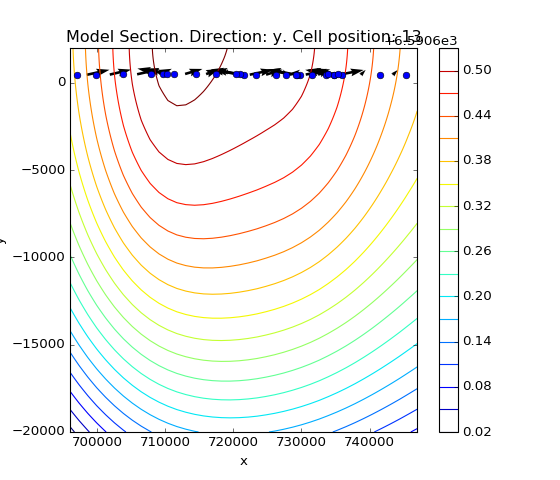

In [128]:
sandstone.compute_potential_field("EarlyGranite_Series", verbose = 1)
sandstone.plot_potential_field_2D(direction = "y", cell_pos = 13, figsize=(7,6), contour_lines = 20)